# COVID-19 en México
## Josué Juárez Morales
---------
datos obtenidos de: https://datos.gob.mx/busca/dataset/informacion-referente-a-casos-covid-19-en-mexico

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('201029COVID19MEXICO.csv', encoding='latin-1')
fecha = '29 de octubre 2020'

In [3]:
data.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA,RESULTADO_LAB,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-10-29,0a9217,1,4,9,2,9,9,5,2,...,2,2,99,1,1,3,99,MÃ©xico,97,2
1,2020-10-29,1aa972,2,12,9,2,9,9,17,1,...,2,2,1,1,1,3,99,MÃ©xico,97,97
2,2020-10-29,00f853,2,12,9,2,9,9,17,1,...,2,2,1,1,1,3,99,MÃ©xico,97,97
3,2020-10-29,1315ae,2,12,11,1,11,11,27,1,...,2,2,2,1,1,3,99,MÃ©xico,97,97
4,2020-10-29,1426fb,1,4,10,1,28,10,7,1,...,2,2,99,1,1,3,99,MÃ©xico,97,97


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2365584 entries, 0 to 2365583
Data columns (total 38 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   FECHA_ACTUALIZACION  object
 1   ID_REGISTRO          object
 2   ORIGEN               int64 
 3   SECTOR               int64 
 4   ENTIDAD_UM           int64 
 5   SEXO                 int64 
 6   ENTIDAD_NAC          int64 
 7   ENTIDAD_RES          int64 
 8   MUNICIPIO_RES        int64 
 9   TIPO_PACIENTE        int64 
 10  FECHA_INGRESO        object
 11  FECHA_SINTOMAS       object
 12  FECHA_DEF            object
 13  INTUBADO             int64 
 14  NEUMONIA             int64 
 15  EDAD                 int64 
 16  NACIONALIDAD         int64 
 17  EMBARAZO             int64 
 18  HABLA_LENGUA_INDIG   int64 
 19  INDIGENA             int64 
 20  DIABETES             int64 
 21  EPOC                 int64 
 22  ASMA                 int64 
 23  INMUSUPR             int64 
 24  HIPERTENSION         int

# Casos positivos acumulados
---
Los individuos considerados como positivos estan indicados por un valor de $1, 2, 3$ en la columna de CLASIFICACION_FINAL. El número de casos positivos en un día son la suma de los individuos con los valores mencionados anteriormente.

In [5]:
total_positivos_acumulados = data[['FECHA_SINTOMAS','CLASIFICACION_FINAL']][data['CLASIFICACION_FINAL'] < 4].groupby('FECHA_SINTOMAS').count().sum()[0]

In [6]:
positivos_acumulados = data[['FECHA_SINTOMAS','CLASIFICACION_FINAL']][data['CLASIFICACION_FINAL'] < 4].groupby('FECHA_SINTOMAS').count().cumsum()
positivos_acumulados.index = pd.to_datetime(positivos_acumulados.index, format='%Y-%m-%d')

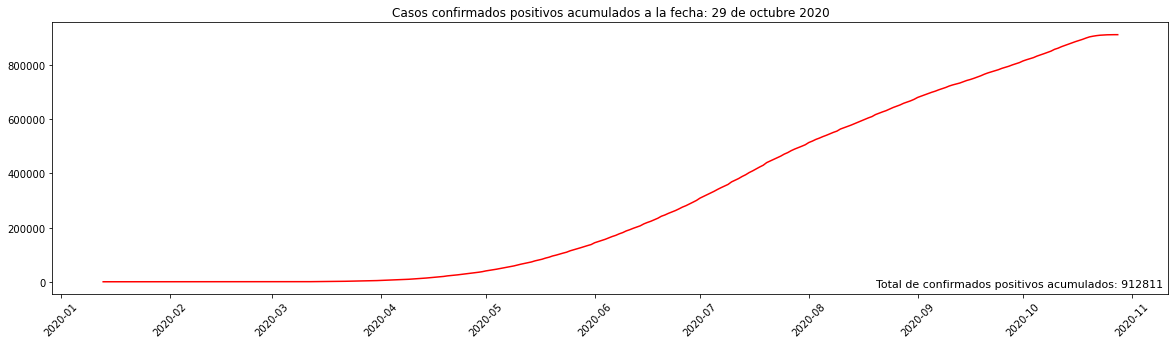

In [7]:
plt.figure(figsize = (20,5))
plt.title('Casos confirmados positivos acumulados a la fecha: ' + fecha)
plt.xticks(rotation=45)
plt.annotate("Total de confirmados positivos acumulados: " + str(total_positivos_acumulados), xy=(1, 0), xycoords='axes fraction', fontsize=11,
                   xytext=(-5, 5), textcoords='offset points',
                   ha='right', va='bottom')
plt.plot(positivos_acumulados, color = 'red')
plt.savefig('positivosacum.png', bbox_inches='tight')

## Casos positivos por sexo
----
Un individuo femenino es representado por un $1$ y uno masculino por un $2$ en la columna de SEXO.

In [8]:
positivos_por_sexo = data['SEXO'][data['CLASIFICACION_FINAL'] < 4].value_counts(normalize=True)

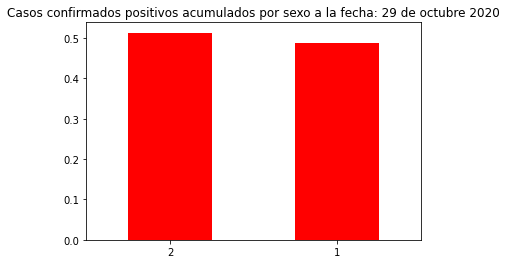

In [9]:
fig = positivos_por_sexo.plot.bar(color = 'red', title = 'Casos confirmados positivos acumulados por sexo a la fecha: ' + fecha)
plt.xticks(rotation=0)
fig.figure.savefig('positivoscum-hm.png', bbox_inches='tight')

## Casos poisitivos por comorbilidades principales
---
Un valor de $1$ representa "Sí", y un valor de $2$ es un "No". 

Mientras que un valor de $98$ representa "SE IGNORA". Para estos casos se considera como un valor faltante.

In [10]:
positivos_comorbilidades = data[['HIPERTENSION', 'DIABETES', 'OBESIDAD', 'EPOC', 'ASMA', 'INMUSUPR', 'OTRA_COM', 'CARDIOVASCULAR', 'RENAL_CRONICA']][data['CLASIFICACION_FINAL'] < 4]
positivos_comorbilidades = positivos_comorbilidades.replace(98, np.nan)

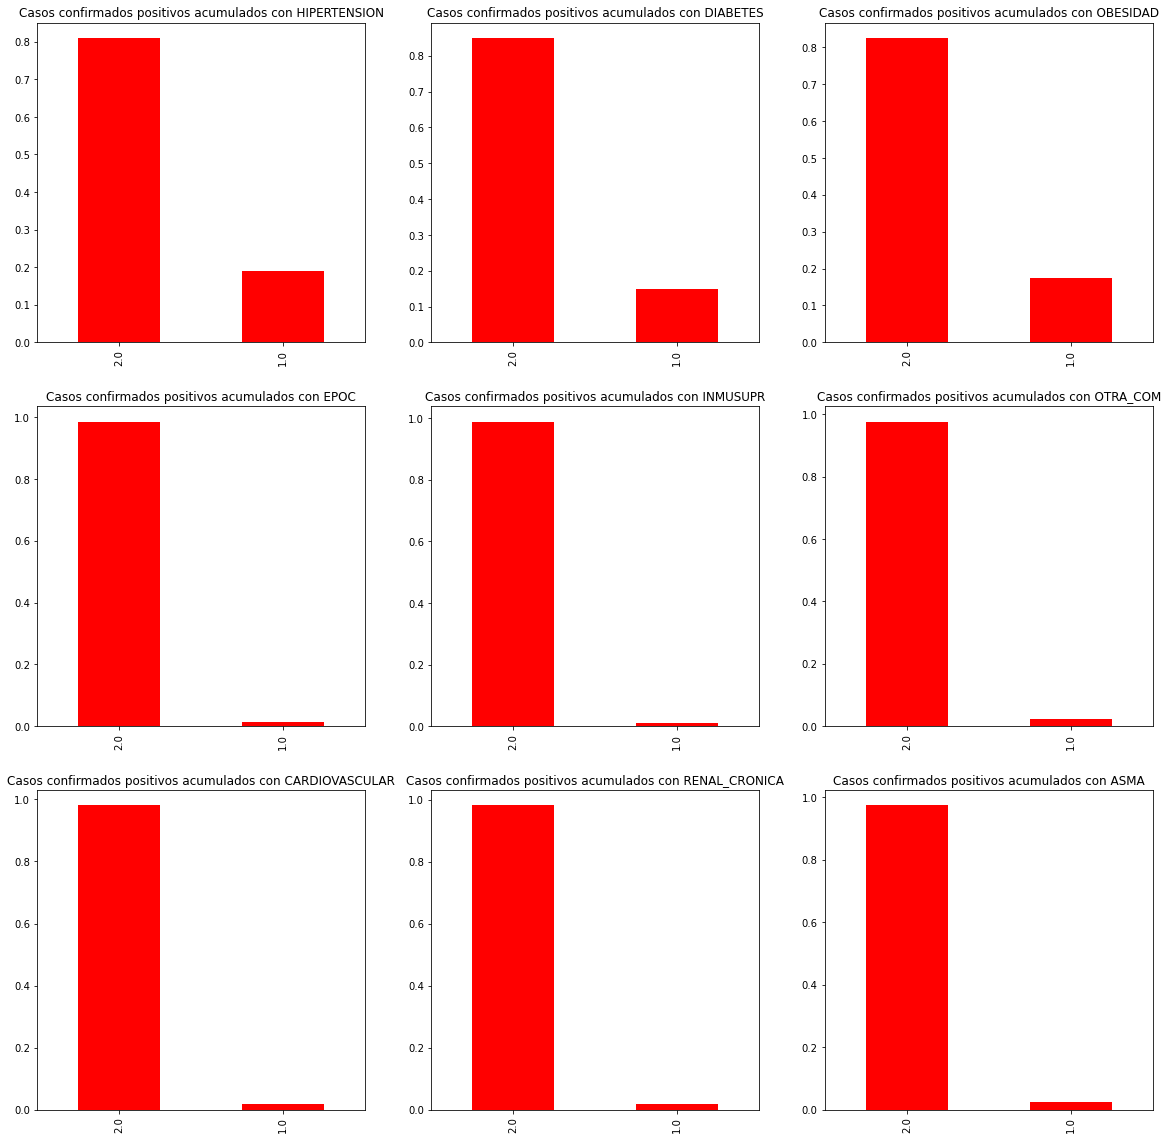

In [11]:
fig, axs = plt.subplots(3, 3, figsize=(20,20))

positivos_comorbilidades['HIPERTENSION'].value_counts(normalize=True).plot.bar(ax = axs[0,0], color = 'red', title = 'Casos confirmados positivos acumulados con HIPERTENSION')
positivos_comorbilidades['DIABETES'].value_counts(normalize=True).plot.bar(ax = axs[0,1], color = 'red', title = 'Casos confirmados positivos acumulados con DIABETES')
positivos_comorbilidades['OBESIDAD'].value_counts(normalize=True).plot.bar(ax = axs[0,2], color = 'red', title = 'Casos confirmados positivos acumulados con OBESIDAD')
positivos_comorbilidades['EPOC'].value_counts(normalize=True).plot.bar(ax = axs[1,0], color = 'red', title = 'Casos confirmados positivos acumulados con EPOC')
positivos_comorbilidades['INMUSUPR'].value_counts(normalize=True).plot.bar(ax = axs[1,1], color = 'red', title = 'Casos confirmados positivos acumulados con INMUSUPR')
positivos_comorbilidades['OTRA_COM'].value_counts(normalize=True).plot.bar(ax = axs[1,2], color = 'red', title = 'Casos confirmados positivos acumulados con OTRA_COM')
positivos_comorbilidades['CARDIOVASCULAR'].value_counts(normalize=True).plot.bar(ax = axs[2,0], color = 'red', title = 'Casos confirmados positivos acumulados con CARDIOVASCULAR')
positivos_comorbilidades['RENAL_CRONICA'].value_counts(normalize=True).plot.bar(ax = axs[2,1], color = 'red', title = 'Casos confirmados positivos acumulados con RENAL_CRONICA')
positivos_comorbilidades['ASMA'].value_counts(normalize=True).plot.bar(ax = axs[2,2], color = 'red', title = 'Casos confirmados positivos acumulados con ASMA')

fig.savefig('positivivos_comorbilidades.png', bbox_inches='tight')

## Casos positivos por edad

In [12]:
positivos_edad = data[['EDAD']][data['CLASIFICACION_FINAL'] < 4]
media = positivos_edad.mean()
std = positivos_edad.std()

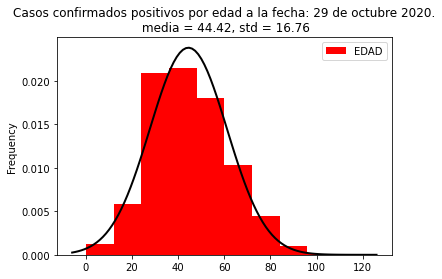

In [13]:
fig = positivos_edad.plot.hist(density=True, color = 'red', title = 'Casos confirmados positivos por edad a la fecha: ' + fecha + '.\n media = ' + str(round(media[0],2)) + ', std = ' + str(round(std[0],2)))
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, media, std)
plt.plot(x, p, 'k', linewidth=2)
fig.figure.savefig('positivos_edad.png', bbox_inches='tight')

# Defunciones acumuladas por COVID-19
----
Las defunciones las obtenemos filtrando a los individuos con resultado positivo a COVID-19 y con fecha de defunción válida.

In [14]:
total_defunciones_acumuladas = defunciones_acumuladas = data[['FECHA_DEF','CLASIFICACION_FINAL']][(data['FECHA_DEF'] != '9999-99-99') & (data['CLASIFICACION_FINAL'] < 4)].groupby('FECHA_DEF').count().sum()[0]

defunciones_acumuladas = data[['FECHA_DEF','CLASIFICACION_FINAL']][(data['FECHA_DEF'] != '9999-99-99') & (data['CLASIFICACION_FINAL'] < 4)].groupby('FECHA_DEF').count().cumsum()
defunciones_acumuladas.index = pd.to_datetime(defunciones_acumuladas.index, format='%Y-%m-%d')

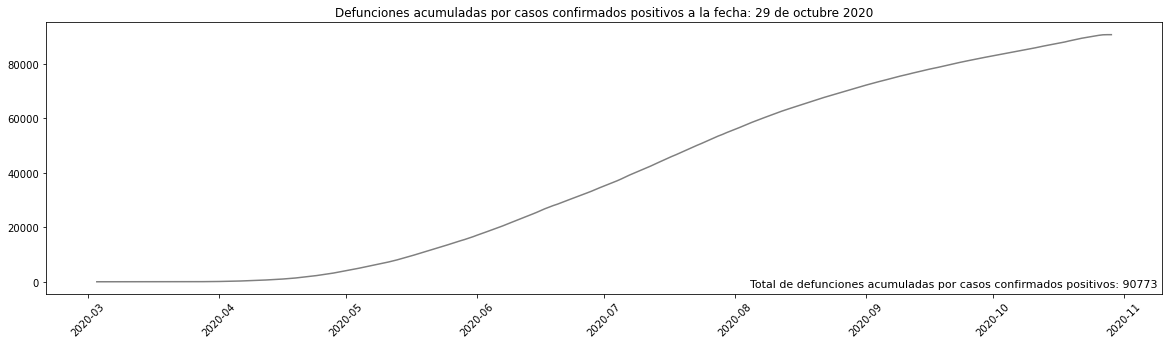

In [15]:
plt.figure(figsize = (20,5))
plt.title('Defunciones acumuladas por casos confirmados positivos a la fecha: ' + fecha)
plt.xticks(rotation=45)
plt.annotate("Total de defunciones acumuladas por casos confirmados positivos: " + str(total_defunciones_acumuladas), xy=(1, 0), xycoords='axes fraction', fontsize=11,
                   xytext=(-5, 5), textcoords='offset points',
                   ha='right', va='bottom')
plt.plot(defunciones_acumuladas, color = 'grey')
plt.savefig('defuncionescum.png', bbox_inches='tight')

## Defunciones por sexo
----


In [16]:
defunciones_por_sexo = data['SEXO'][(data['FECHA_DEF'] != '9999-99-99') & (data['CLASIFICACION_FINAL'] < 4)].value_counts(normalize=True)

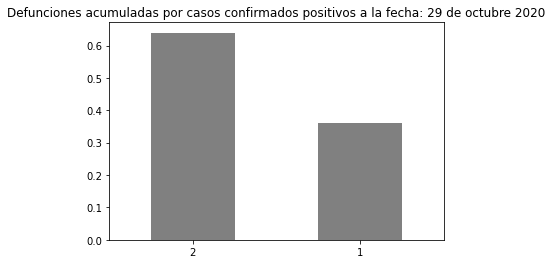

In [17]:
fig = defunciones_por_sexo.plot.bar(color = 'grey', title = 'Defunciones acumuladas por casos confirmados positivos a la fecha: ' + fecha)
plt.xticks(rotation=0)
fig.figure.savefig('defuncionescum-hm.png', bbox_inches='tight')

## Defunciones por comorbilidades principales
---

In [18]:
defunciones_comorbilidades = data[['HIPERTENSION', 'DIABETES', 'OBESIDAD', 'EPOC', 'ASMA', 'INMUSUPR', 'OTRA_COM', 'CARDIOVASCULAR', 'RENAL_CRONICA']][(data['FECHA_DEF'] != '9999-99-99') & (data['CLASIFICACION_FINAL'] < 4)]
defunciones_comorbilidades = defunciones_comorbilidades.replace(98, np.nan)

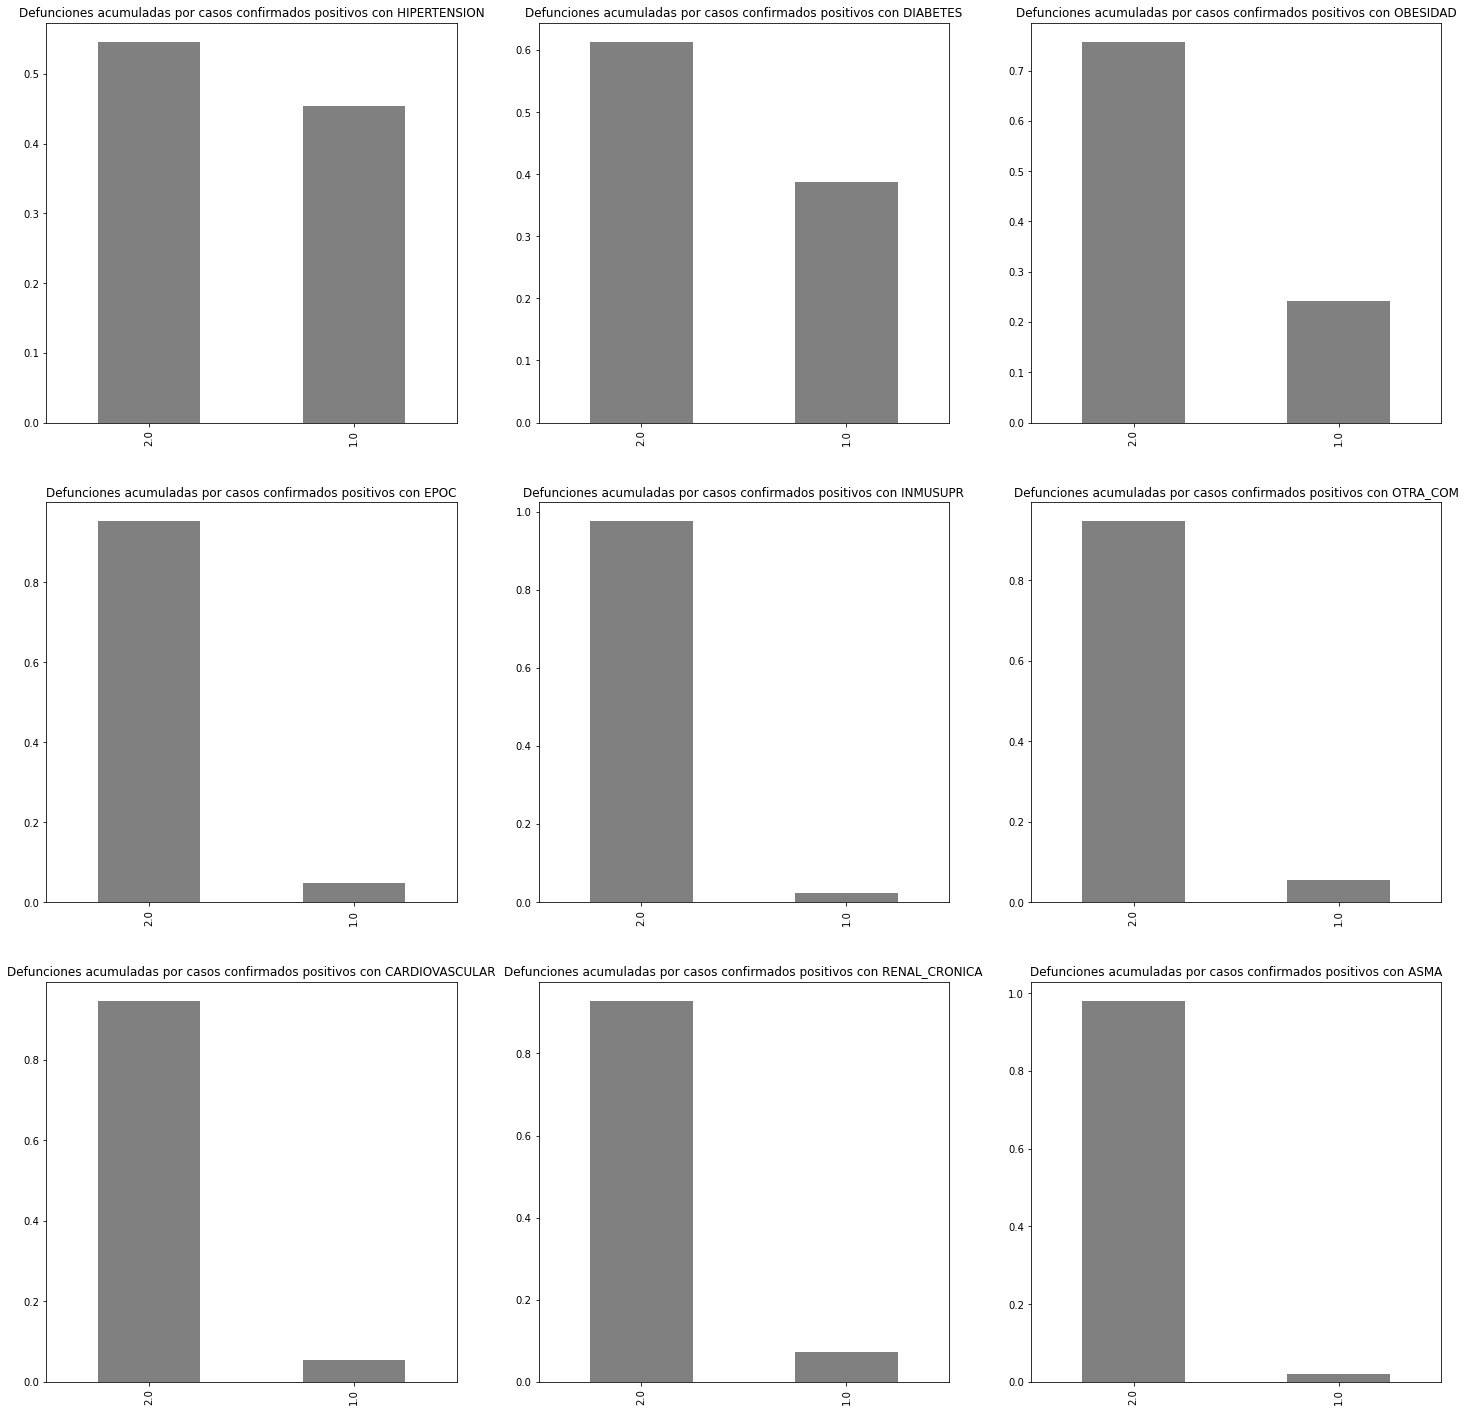

In [19]:
fig, axs = plt.subplots(3, 3, figsize=(25,25))

defunciones_comorbilidades['HIPERTENSION'].value_counts(normalize=True).plot.bar(ax = axs[0,0], color = 'grey', title = 'Defunciones acumuladas por casos confirmados positivos con HIPERTENSION')
defunciones_comorbilidades['DIABETES'].value_counts(normalize=True).plot.bar(ax = axs[0,1], color = 'grey', title = 'Defunciones acumuladas por casos confirmados positivos con DIABETES')
defunciones_comorbilidades['OBESIDAD'].value_counts(normalize=True).plot.bar(ax = axs[0,2], color = 'grey', title = 'Defunciones acumuladas por casos confirmados positivos con OBESIDAD')
defunciones_comorbilidades['EPOC'].value_counts(normalize=True).plot.bar(ax = axs[1,0], color = 'grey', title = 'Defunciones acumuladas por casos confirmados positivos con EPOC')
defunciones_comorbilidades['INMUSUPR'].value_counts(normalize=True).plot.bar(ax = axs[1,1], color = 'grey', title = 'Defunciones acumuladas por casos confirmados positivos con INMUSUPR')
defunciones_comorbilidades['OTRA_COM'].value_counts(normalize=True).plot.bar(ax = axs[1,2], color = 'grey', title = 'Defunciones acumuladas por casos confirmados positivos con OTRA_COM')
defunciones_comorbilidades['CARDIOVASCULAR'].value_counts(normalize=True).plot.bar(ax = axs[2,0], color = 'grey', title = 'Defunciones acumuladas por casos confirmados positivos con CARDIOVASCULAR')
defunciones_comorbilidades['RENAL_CRONICA'].value_counts(normalize=True).plot.bar(ax = axs[2,1], color = 'grey', title = 'Defunciones acumuladas por casos confirmados positivos con RENAL_CRONICA')
defunciones_comorbilidades['ASMA'].value_counts(normalize=True).plot.bar(ax = axs[2,2], color = 'grey', title = 'Defunciones acumuladas por casos confirmados positivos con ASMA')

fig.savefig('defunciones_comorbilidades.png', bbox_inches='tight')

## Defunciones por edad
----

In [20]:
defunciones_edad = data[['EDAD']][(data['FECHA_DEF'] != '9999-99-99') & (data['CLASIFICACION_FINAL'] < 4)]
media = defunciones_edad.mean()
std = defunciones_edad.std()

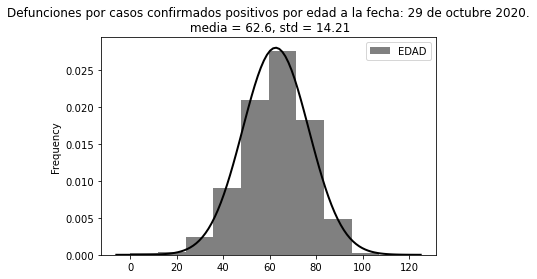

In [21]:
fig = defunciones_edad.plot.hist(density=True, color = 'grey', title = 'Defunciones por casos confirmados positivos por edad a la fecha: ' + fecha + '.\n media = ' + str(round(media[0],2)) + ', std = ' + str(round(std[0],2)))
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, media, std)
plt.plot(x, p, 'k', linewidth=2)
fig.figure.savefig('defunciones_edad.png', bbox_inches='tight')